# 23 Fall MAS 456 Homework 2 Solution.

In [1]:
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, 
                                           QuadraticDiscriminantAnalysis as QDA)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Chapter 4.

### 14.

In [2]:
Auto = load_data("Auto")
print(f"the number of NAs: \n {np.sum(Auto.isna())}")

the number of NAs: 
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


(a). Creating

In [3]:
mpg01 = (Auto['mpg'] > Auto['mpg'].median()).astype(int)
Auto['mpg01'] = mpg01

(b). Maybe "cylinders, displacement, horsepower, weight, year, and origin" after doing some exploratory data analysis (EDA).

(c). Splitting

In [4]:
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin']]
y = Auto.mpg01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

(d, e, f, g, h). LDA, QDA, logistic regression, naive Bayes, KNN.

In [5]:
model = LDA()
model.fit(X_train, y_train)

print(f'test error: {100*np.mean(model.predict(X_test) != y_test):.2f}%')
print(f'the number of wrong predictions: {np.sum(model.predict(X_test) != y_test)}')

test error: 10.19%
the number of wrong predictions: 16


In [6]:
model = QDA()
model.fit(X_train, y_train)

print(f'test error: {100*np.mean(model.predict(X_test) != y_test):.2f}%')
print(f'the number of wrong predictions: {np.sum(model.predict(X_test) != y_test)}')

test error: 7.01%
the number of wrong predictions: 11


In [7]:
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)

print(f'test error: {100*np.mean(model.predict(X_test) != y_test):.2f}%')
print(f'the number of wrong predictions: {np.sum(model.predict(X_test) != y_test)}')

test error: 7.64%
the number of wrong predictions: 12


In [8]:
model = GaussianNB()
model.fit(X_train, y_train)

print(f'test error: {100*np.mean(model.predict(X_test) != y_test):.2f}%')
print(f'the number of wrong predictions: {np.sum(model.predict(X_test) != y_test)}')

test error: 8.28%
the number of wrong predictions: 13


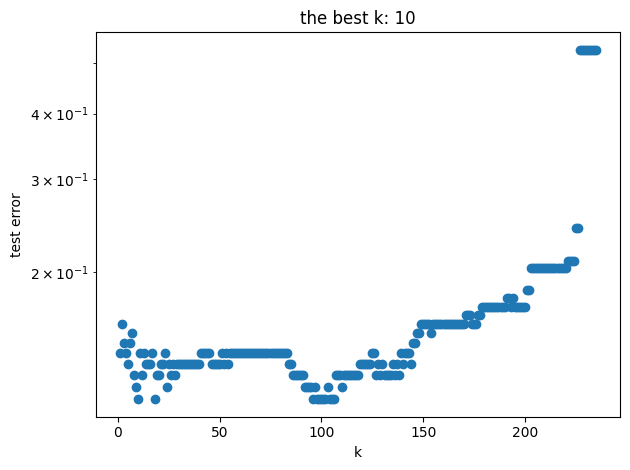

In [9]:
errors = []
ks, _ = X_train.shape

for k in range(ks):
    model = KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, y_train)
    error = np.mean(model.predict(X_test) != y_test)
    errors.append(error)

best_k = np.argmin(errors) +1

plt.semilogy(np.arange(1, ks+1), errors, 'o', lw=.1)
plt.xlabel("k")
plt.ylabel("test error")
plt.title(f"the best k: {best_k}")
plt.tight_layout()
plt.show()

## Chapter 5.

### 2.

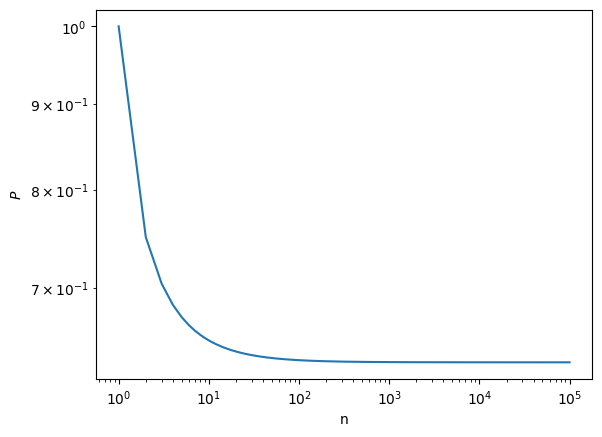

In [10]:
def prob(n):
    return 1-(1-1/n)**n

n = np.arange(1, 10**5+1)

plt.loglog(n, prob(n))
plt.xlabel("n")
plt.ylabel(r"$P$")
plt.show()

In [11]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100,100,replace=True) == 4) > 0
np.mean(store)

0.6362

### 5.

In [12]:
Default = load_data('Default')
print(f"the number of NAs: \n {np.sum(Default.isna())}")

the number of NAs: 
 default    0
student    0
balance    0
income     0
dtype: int64


(a)

In [13]:
model = LogisticRegression(penalty=None)
model.fit(Default[['income', 'balance']], Default['default'])
print(f"coef:{model.coef_}, intercept:{model.intercept_}")

coef:[[2.08089921e-05 5.64710291e-03]], intercept:[-11.54046839]


(b)

In [14]:
X = Default[['income', 'balance']]
y = Default["default"] == "Yes"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test) > 0.5
print(f"test error: {100*np.mean((y_pred[:,1] != y_test)):.3f}%")

test error: 3.075%


(c): skip.

(d)

In [15]:
X = Default[['income', 'balance', 'student']]
X["student"] = Default['student'] == "Yes"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=3)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test) > 0.5
print(f"test error: {100*np.mean((y_pred[:,1] != y_test)):.3f}%")

test error: 3.225%


/var/folders/ln/4jwqd3695wvcnj49xbxpr_sh0000gn/T/ipykernel_20963/3743146216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["student"] = Default['student'] == "Yes"


### 6.

(a)

In [16]:
names = MS(['income', 'balance'])
X = names.fit_transform(Default)
y = Default.default == 'Yes'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
income,0.000021,0.000005,4.174,0.0
balance,0.005600,0.000000,24.835,0.0


(b)

In [17]:
def boot_fn(data, indices):
  predictor = data.iloc[indices]
  response = predictor.default == 'Yes'
  predictor = names.fit_transform(predictor)
  glm = sm.GLM(response, predictor, family=sm.families.Binomial())
  results = glm.fit()
  return results.params

(c)

In [18]:
def boot_SE(func, D, n=None, B=1000, seed=0):
  rng = np.random.default_rng(seed)
  first_ , second_ = 0, 0
  n = n or D.shape[0]
  for _ in range(B):
    idx = rng.choice(D.index, n, replace=True)
    value = func(D, idx)
    first_ += value
    second_ += value **2
  return np.sqrt(second_ / B - (first_ / B)**2)

In [19]:
print(boot_SE(boot_fn, Default, B=1000, seed=0))

intercept    0.435692
income       0.000005
balance      0.000230
dtype: float64


### 7.

In [20]:
Smarket = load_data('Weekly')
print(f"the number of NAs: \n {np.sum(Smarket.isna())}")

the number of NAs: 
 Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64


(a)

In [21]:
names = MS(['Lag1', 'Lag2'])
X = names.fit_transform(Smarket)
y = Smarket.Direction == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2212,0.061,3.599,0.000
Lag1,-0.0387,0.026,-1.477,0.140
Lag2,0.0602,0.027,2.270,0.023


(b)

In [22]:
glm = sm.GLM(y[1:], X[1:], family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2232,0.061,3.630,0.000
Lag1,-0.0384,0.026,-1.466,0.143
Lag2,0.0608,0.027,2.291,0.022


(c)

In [23]:
print(f'Prob: {100*results.predict(X.iloc[0])[0]:.3f}%')

Prob: 57.139%


(d)

In [24]:
n = len(Smarket)
loocv = 0

for i in range(n):
  glm = sm.GLM(y.drop(i), X.drop(i), family=sm.families.Binomial())
  results = glm.fit()
  pred = (results.predict(X.iloc[i])[0] > 0.5).astype(int)
  wrong = (pred != y[i]).astype(int)
  loocv += wrong

loocv /= n
print(f"estimated test error: {100*loocv:.3f}%")

estimated test error: 44.995%
